In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D

---
# Singular value decomposition
---

In [2]:
# the matrix
A = [[3,0,5], [8,1,3]]

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)

print("Matrix U: \n", U), print(' ')
print("S is a vector(in python): \n", S), print(' ')
print("V': \n", V)

Matrix U: 
 [[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]
 
S is a vector(in python): 
 [9.89086518 3.18916698]
 
V': 
 [[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


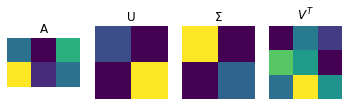

In [3]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

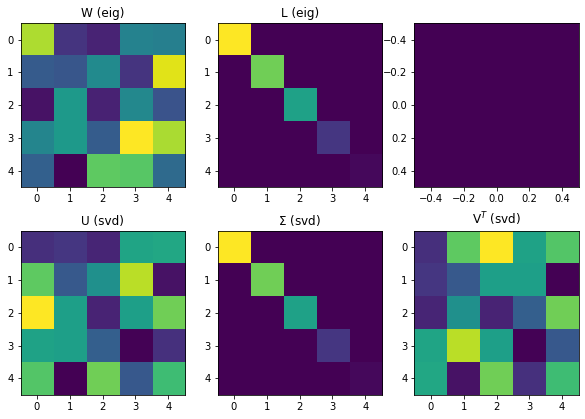

In [4]:
# Code Practice 1: SVD vs eigendecomposition for square symmetric matrices
# what is the relationship btw eig and SVD for a square symmetric matrix
# create a symmetric matrix (5x5)
A = np.random.randn(5,5)
A = A.T@A

# compute eig (W, L) and svd (U,S,V)
L, W = np.linalg.eig(A)
U, S, V = np.linalg.svd(A)

# sort eig outputs
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:,sidx]

# image of all matrices
fig, ax = plt.subplots(2,3,figsize=(10,7))
ax[0,0].imshow(W)
ax[0,0].set_title('W (eig)')
ax[0,1].imshow(np.diag(L))
ax[0,1].set_title('L (eig)')
ax[0,2].imshow(np.zeros((1,1)))

ax[1,0].imshow(U)
ax[1,0].set_title('U (svd)')
ax[1,1].imshow(np.diag(S))
ax[1,1].set_title('$\Sigma$ (svd)')
ax[1,2].imshow(V)
ax[1,2].set_title('V$^T$ (svd)')

plt.show()

In [5]:
# compare U and V
print(np.round(U-V.T, 4))  # we subtract V.T bcz in python V is actually V' so to get V we do V.T i.e V = V''

[[ 0.  0. -0. -0.  0.]
 [ 0.  0. -0. -0.  0.]
 [-0.  0. -0. -0.  0.]
 [-0. -0.  0. -0. -0.]
 [-0. -0.  0.  0. -0.]]


In [6]:
# compare U and W
print(np.round(U-W, 4))

[[-1.1395  0.     -0.      0.1744  0.2118]
 [ 0.6545 -0.      0.      1.0725 -1.3796]
 [ 1.3762  0.     -0.      0.1092  0.745 ]
 [ 0.1458  0.     -0.     -1.511  -1.128 ]
 [ 0.5984 -0.     -0.     -0.7242  0.4737]]


---
# Relation between singular values and eigenvalues
---

In [7]:
# case 1: eig(A'A) vs. svd(A)
A = np.array([[3,1,0], [1,1,0]])

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A)[1])**2)

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [8]:
# case 2: eig(A'A) vs. svd(A'A)

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [9]:
# case 3a: eig(A) vs. svd(A), real-valued eigs

# need a square matrix for eig
A = [[3,1,0], [1,1,0], [1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [10]:
# case 3b: eig(A) vs. svd(A), complex eigs

# random matrices are likely to give complex eigenvalues
A = np.random.randn(3,3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[-0.11728371+0.j          0.59600044-0.53918852j  0.59600044+0.53918852j]
[0.08868513 0.43949994 1.94366209]


In [11]:
# Code Practice 2: U from eigendecomposition of A^TA
""" As we know that A = UΣV' and ...
=> A'A = VΣ^2V'
=> Av = uσ
=> u = Av/σ
where A is a matrix
U is Left singular vectors matrix and u is i'th vector(column) of U
V is Right singular vectors matrix and v is i'th vector(column) of V
Σ(sigma) is Singular values matrix and σ(small sigma) is i'th value of Σ
"""

# create a matrix (3x6 matrix)
m = 3
n = 6
A = np.random.randn(m, n)

# full SVD (variables Us, Ss, Vs)
Us,Ss,Vs = np.linalg.svd(A)

# eig of A'A (variables V, L)
L,V = np.linalg.eig(A.T@A)
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:,sidx]

print("Us from svd\n", Us)
print()
print("Ss from svd\n", Ss)
print()
print("Vs from svd\n", Vs)
print()

print("V from eig\n", V)
print()
print("L from eig\n", L)

Us from svd
 [[-0.57123851  0.18252703  0.8002315 ]
 [ 0.81783326  0.20917424  0.53609224]
 [-0.06953649  0.96069247 -0.26876506]]

Ss from svd
 [2.13145553 1.29828093 1.18235236]

Vs from svd
 [[ 0.36190133 -0.19540523 -0.39819214 -0.07816932 -0.4355696  -0.69025787]
 [ 0.04686676 -0.06027224 -0.2393024   0.4674935  -0.65382607  0.53932033]
 [-0.13438298  0.12641162  0.80533837  0.12174671 -0.46774862 -0.28944844]
 [ 0.42733327  0.23754926  0.06167074  0.76300923  0.36858815 -0.19777014]
 [-0.31396832 -0.86346967  0.08906568  0.32808699  0.16566625 -0.11324728]
 [ 0.75338059 -0.37442572  0.35195386 -0.26588149  0.02644406  0.31138286]]

V from eig
 [[ 0.36190133+0.j         -0.04686676+0.j         -0.13438298+0.j
  -0.00650634+0.j         -0.03361293+0.15694297j -0.03361293-0.15694297j]
 [-0.19540523+0.j          0.06027224+0.j          0.12641162+0.j
   0.18599657+0.j         -0.70982269+0.j         -0.70982269-0.j        ]
 [-0.39819214+0.j          0.2393024 +0.j          0.8053383

In [12]:
# confirm that V == Vs
print(np.round(Vs.T-V, 2))
print()
print(Vs.T)
print()
print(V)
print()
""" here three columns will be same bcz rank(A) = 3which means that there are only three singular values 
other are the null space of the matrix that is they are trivial and they could be same or not doesn't matter
"""

# check the relationship between Ss and L
print(L)
print()
print(Ss**2)

[[-0.  +0.j    0.09+0.j   -0.  +0.j    0.43+0.j   -0.28-0.16j  0.79+0.16j]
 [-0.  +0.j   -0.12+0.j   -0.  +0.j    0.05+0.j   -0.15+0.j    0.34+0.j  ]
 [-0.  +0.j   -0.48+0.j   -0.  +0.j    0.08+0.j   -0.08-0.06j  0.18+0.06j]
 [ 0.  +0.j    0.93+0.j    0.  +0.j    1.62+0.j    0.79+0.33j  0.2 -0.33j]
 [-0.  +0.j   -1.31+0.j   -0.  +0.j    0.75+0.j    0.31+0.12j  0.17-0.12j]
 [ 0.  +0.j    1.08+0.j    0.  +0.j   -0.49+0.j   -0.34-0.16j  0.08+0.16j]]

[[ 0.36190133  0.04686676 -0.13438298  0.42733327 -0.31396832  0.75338059]
 [-0.19540523 -0.06027224  0.12641162  0.23754926 -0.86346967 -0.37442572]
 [-0.39819214 -0.2393024   0.80533837  0.06167074  0.08906568  0.35195386]
 [-0.07816932  0.4674935   0.12174671  0.76300923  0.32808699 -0.26588149]
 [-0.4355696  -0.65382607 -0.46774862  0.36858815  0.16566625  0.02644406]
 [-0.69025787  0.53932033 -0.28944844 -0.19777014 -0.11324728  0.31138286]]

[[ 0.36190133+0.j         -0.04686676+0.j         -0.13438298+0.j
  -0.00650634+0.j         -0.0

In [13]:
# create U using A, V and L
U = np.zeros((m,m))
for i in range(m):
    U[:,i] = A@V[:,i].T/np.sqrt(L[i])

# confirm that U == Us
print(Us)
print()
print(U)

[[-0.57123851  0.18252703  0.8002315 ]
 [ 0.81783326  0.20917424  0.53609224]
 [-0.06953649  0.96069247 -0.26876506]]

[[-0.57123851 -0.18252703  0.8002315 ]
 [ 0.81783326 -0.20917424  0.53609224]
 [-0.06953649 -0.96069247 -0.26876506]]


/tmp/ipykernel_15295/3323253172.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,i] = A@V[:,i].T/np.sqrt(L[i])


In [14]:
# Code Problem 3: A^TA, AV and singular vectors
# claim: If v is an eigenvector of A'A then Av is an eigenvector of AA' and both have same eigenvalue
# i.e., AA'Av - Avl = 0   (0 --> diffs)
m = 4
A = np.random.randn(m,m)
AtA = A.T@A
AAt = A@A.T

U,S,V = np.linalg.svd(AtA)
print(U)
print()
print(V.T)
print()
diffs = np.zeros(m)
for i in range(m):
    diffs[i] = sum((AAt@A@U[:,i] - A@U[:,i]*S[i])**2)            # U = V (V.T in python) for symmetric matrices

print(diffs)

[[-0.50136476 -0.71820122 -0.04876388 -0.48004423]
 [ 0.12941919 -0.35077326  0.8774453   0.30049715]
 [ 0.50006546  0.17057747  0.27009166 -0.80491513]
 [ 0.69413154 -0.57623645 -0.39339843  0.17711757]]

[[-0.50136476 -0.71820122 -0.04876388 -0.48004423]
 [ 0.12941919 -0.35077326  0.8774453   0.30049715]
 [ 0.50006546  0.17057747  0.27009166 -0.80491513]
 [ 0.69413154 -0.57623645 -0.39339843  0.17711757]]

[1.54940294e-28 4.27957041e-29 3.72539133e-29 1.63719302e-29]


---
# Spectral theory of matrices
---

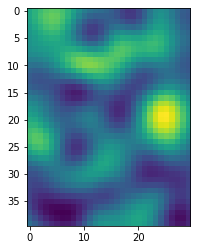

In [15]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

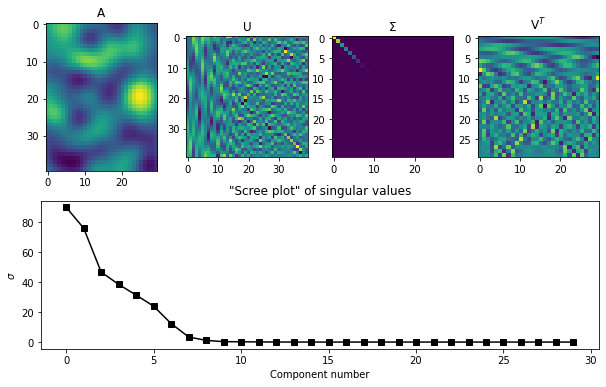

In [16]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

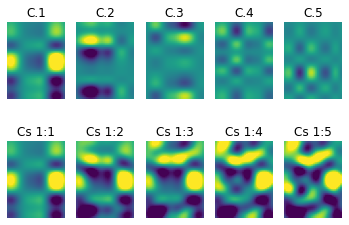

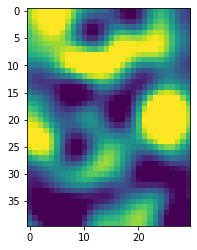

In [17]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()

---
# SVD for low-rank approximations
---

In [18]:
# matrix sizes
m = 40
n = 30


# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# number of components (singular "layers") to keep
nComps = 4

# reduced matrices
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print('rank =',np.linalg.matrix_rank(reconImage))

rank = 4


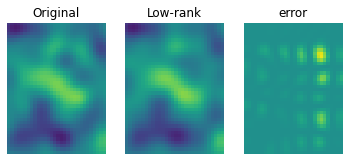

In [19]:
# error map and percent difference from original matrix
errormap = (reconImage-A)**2

# show the results!
plt.subplot(131)
plt.imshow(A,vmin=-15,vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage, vmin=-15,vmax=15)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap,vmin=-15,vmax=15)
plt.axis('off')
plt.title('error')
plt.show()

---
# Convert singular values to percent variance
---

In [20]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

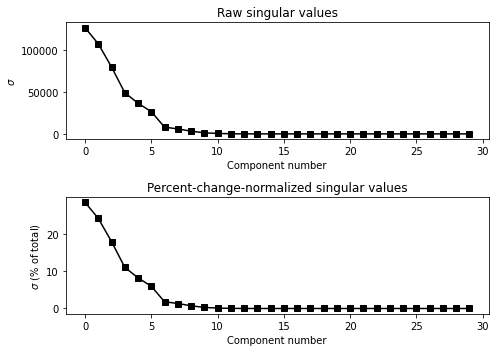

In [21]:
Ascaled = A*1577

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()

In [22]:
# Code Practice 4: when is UV^T valid, what is its norm and is it orthogonal?

# generate a matrix such that UV^T is valid
A = np.random.randn(5,5)
U,S,V = np.linalg.svd(A)

# norm of U, norm of V, and the norm of V'
print(np.linalg.norm(U, 2))
print(np.linalg.norm(V, 2))

# norm of U@V
print(np.linalg.norm(U@V, 2))   # 2 indicates induced-2 norm

# U*U', V*V', U*V'
print(np.round(U@U.T, 3)), print()
print(np.round(V.T@V, 3)), print()

print(np.round(U@V, 3)), print()

C = U@V
print(np.round(C@C.T, 3))

1.0000000000000004
1.0
1.0
[[ 1. -0.  0. -0.  0.]
 [-0.  1.  0. -0.  0.]
 [ 0.  0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [ 0.  0. -0.  0.  1.]]

[[ 1.  0. -0.  0.  0.]
 [ 0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [ 0. -0. -0.  1. -0.]
 [ 0. -0. -0. -0.  1.]]

[[ 0.87   0.452 -0.104 -0.101  0.131]
 [-0.187  0.392 -0.705  0.468 -0.309]
 [ 0.344 -0.716 -0.317  0.439  0.274]
 [ 0.241 -0.354 -0.161 -0.381 -0.804]
 [ 0.176  0.064  0.605  0.658 -0.408]]

[[ 1. -0.  0. -0.  0.]
 [-0.  1.  0. -0.  0.]
 [ 0.  0.  1. -0.  0.]
 [-0. -0. -0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


---
# SVD, matrix inverse, and pseudoinverse
---

In [23]:
# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print(Ai@A), print(' ')

# compute with pinv function
print(np.linalg.pinv(A)@A)

[[ 2.00000000e-01  4.00000000e-01  4.44089210e-16]
 [ 4.00000000e-01  8.00000000e-01  2.22044605e-16]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]
 
[[ 2.00000000e-01  4.00000000e-01  2.22044605e-16]
 [ 4.00000000e-01  8.00000000e-01  2.22044605e-16]
 [-1.66533454e-16 -3.33066907e-16  1.00000000e+00]]


In [24]:
import inspect
lines = inspect.getsource(np.linalg.pinv)
print(lines)

@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    

---
# Condition number of a matrix
---

113.02118215199292 2.337993688859892e-08


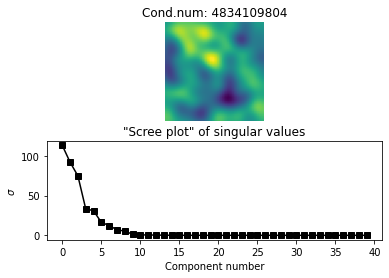

In [25]:
# matrix sizes
m = 40

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(A,g2d,'same')



# SVD
S = np.linalg.svd(A)[1]

# compute condition number
condnum = S[0]/S[-1]
print(S[0],S[-1])

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num: %d' %condnum)

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

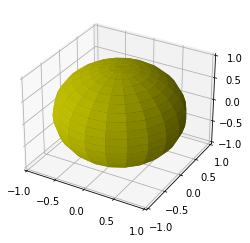

In [26]:
## sphere

# the transformation matrix T
T = np.eye(3)
# T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate((np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='y')
# ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

In [27]:
# Code Practice 5: create matrix with desired condition number

m = 6
n = 16

condnum = 41.99

# create singular vectors matrices
U, junk = np.linalg.qr(np.random.randn(m,m))
V, junk = np.linalg.qr(np.random.randn(n,n))

s = np.linspace(condnum, 1, np.min([m,n]))
S = np.zeros((m,n))

for i in range(len(s)):
    S[i,i] = s[i]

# create matrix
A = U@S@V.T
print(np.linalg.cond(A))

41.99000000000011


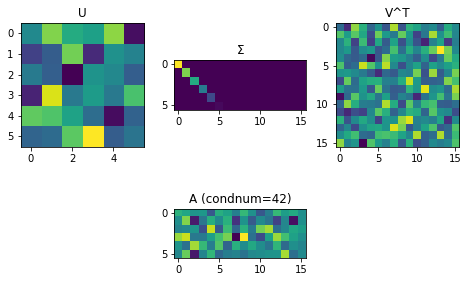

In [28]:
# plotting

fig = plt.subplots(1,figsize=(8,5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V.T)
plt.title('V^T')

plt.subplot(235)
plt.imshow(A)
plt.title('A (condnum=42)')

plt.show()

/tmp/ipykernel_15295/2335556776.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(condnums, matrixSizes, invDiffs, vmax=np.max(invDiffs)*0.6)


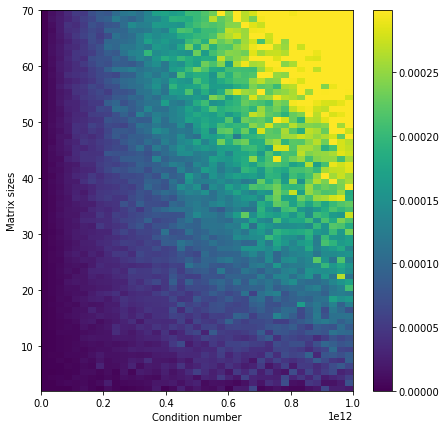

In [29]:
# Code Practice 6: Why avoid inverse (demonstration)
# - Craete a matrix with known cond. number
matrixSizes = np.arange(2, 71)
condnums = np.linspace(10, 1e12, 40)

invDiffs = np.zeros((len(matrixSizes), len(condnums)))

for mi,M in enumerate(matrixSizes):
    for ci,C in enumerate(condnums):
        
        # create A
        U = np.linalg.qr(np.random.randn(M,M))[0]
        V = np.linalg.qr(np.random.randn(M,M))[0]
        S = np.diag(np.linspace(C,1,M))
        A = U@S@V.T
        
        # compute difference from identity matrix
        I = A@np.linalg.inv(A)
        Idiff = np.abs(I-np.eye(M))
        
        # norm of the matrix
        invDiffs[mi, ci] = np.linalg.norm(Idiff)

# visualize
fig = plt.figure(figsize=(7,7))
plt.pcolor(condnums, matrixSizes, invDiffs, vmax=np.max(invDiffs)*0.6)
plt.xlabel('Condition number')
plt.ylabel('Matrix sizes')
plt.colorbar()

plt.show()